<a href="https://colab.research.google.com/github/DebershiMitra/100-days-of-machine-learning-self/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
!gdown 1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8

Downloading...
From: https://drive.google.com/uc?id=1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8
To: /content/spam_clean.csv
100% 484k/484k [00:00<00:00, 5.04MB/s]


In [ ]:
df = pd.read_csv('spam_clean.csv', encoding='latin-1')
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.type.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: type, dtype: float64

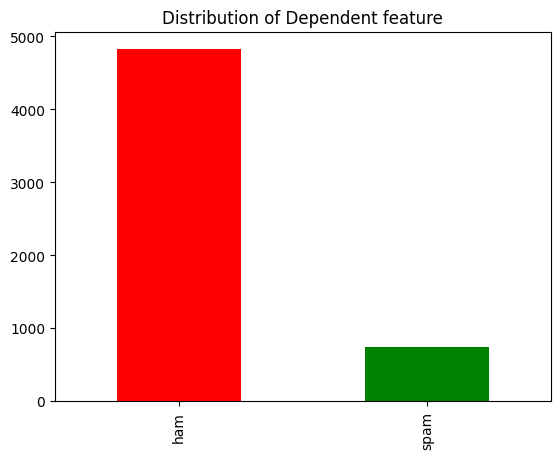

In [ ]:
freq = pd.value_counts(df["type"], sort= True)
freq.plot(kind= 'bar', color= ["red", "green"])
plt.title('Distribution of Dependent feature')
plt.show()

In [ ]:
import re, nltk
nltk.download('punkt') # one time
nltk.download('stopwords') # one time
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:


def clean_tokenized_sentence(s):
    """Performs basic cleaning of a tokenized sentence"""
    cleaned_s = ""  # Create empty string to store processed sentence.
    words = nltk.word_tokenize(s)
    for word in words:
        # Convert to lowercase #
        c_word = word.lower()
        #Remove Numbers
        c_word = re.sub(r'\d+', '', c_word)
        # Remove punctuations #
        c_word = re.sub(r'[^\w\s]', '', c_word)
        # Remove stopwords #
        if c_word != '' and c_word not in stopwords.words('english'):
            cleaned_s = cleaned_s + " " + c_word    # Append processed words to new list.
    return(cleaned_s.strip())

In [ ]:
from nltk import word_tokenize, sent_tokenize

In [ ]:
word_tokenize("This is a test for word tokenization, will it pass?")

['This',
 'is',
 'a',
 'test',
 'for',
 'word',
 'tokenization',
 ',',
 'will',
 'it',
 'pass',
 '?']

In [ ]:
stops = stopwords.words('english')

In [ ]:
stops[:5]

['i', 'me', 'my', 'myself', 'we']

In [ ]:
clean_tokenized_sentence("This is a test for word tokenization , will it pass?")

'test word tokenization pass'

In [ ]:
df["cleaned_message"] = df["message"].apply(clean_tokenized_sentence)
df.head(10)

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling week word back like fun st...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile months u r entitled update latest colou...


In [ ]:
c_word = re.sub(r'\d+', '', 'number9')

In [ ]:
c_word

'number'

In [ ]:
ham = df[df['type'] == 'ham']
ham

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
...,...,...,...
5565,ham,Huh y lei...,huh lei
5568,ham,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [ ]:
ham = ham['cleaned_message']
ham

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
3                     u dun say early hor u c already say
4               nah nt think goes usf lives around though
6          even brother like speak treat like aids patent
                              ...                        
5565                                              huh lei
5568                         ì_ b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: cleaned_message, Length: 4825, dtype: object

In [ ]:
ham = " ".join(ham)
ham

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah nt think goes usf lives around though even brother like speak treat like aids patent per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune gon na home soon nt want talk stuff anymore tonight k cried enough today searching right words thank breather promise wont take help granted fulfil promise wonderful blessing times date sunday oh k watching eh u remember spell name yes v naughty make v wet fine thatåõs way u feel thatåõs way gota b seriously spell name iûm going try months ha ha joking ì_ pay first lar da stock comin aft finish lunch go str lor ard smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice really hungry tho sucks mark getting worried knows sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left dinner fee

In [ ]:
ham = ham.split()


In [ ]:
counter_ham = Counter(" ".join(df[df['type']=='ham']["cleaned_message"]).split()).most_common(20)

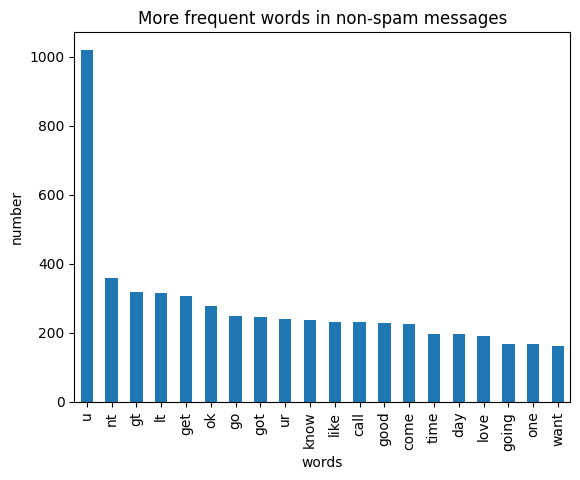

In [ ]:
df_ham = pd.DataFrame(counter_ham)

# Renaming the columns in this dataframe
df_ham = df_ham.rename(columns={0:"words in non-spam", 1:"count"})

# Plotting the data
df_ham.plot.bar(legend = False)
y_pos = np.arange(len(df_ham["words in non-spam"]))
plt.xticks(y_pos, df_ham["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

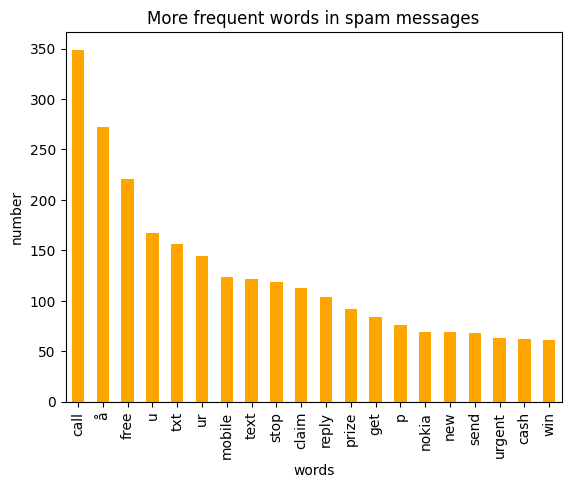

In [ ]:
# Invoking the Counter() object on a list of words occuring in the "cleaned_message" column of spam texts, joined together
counter_spam = Counter(" ".join(df[df['type']=='spam']["cleaned_message"]).split()).most_common(20)

# load the results as a pandas dataframe in order to plot
df_spam = pd.DataFrame(counter_spam)

# Renaming the columns in this dataframe
df_spam = df_spam.rename(columns={0:"words in spam", 1:"count_"})

# Plotting the data
df_spam.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df_spam["words in spam"]))
plt.xticks(y_pos, df_spam["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [ ]:
df["type"] = df["type"].map({'spam':1,'ham':0})

In [ ]:
from sklearn.model_selection import train_test_split

df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'], test_size=0.25, random_state=42)
print([np.shape(df_X_train), np.shape(df_X_test)])

[(4179,), (1393,)]


In [ ]:
df_X_train

4281                                               u call
585               tell u headache want use hour sick time
4545    never try alone take weight tear comes ur hear...
3034    raji pls favour pls convey birthday wishes nim...
2758                                        time iûm prob
                              ...                        
3772        came hostel going sleep plz call class hrishi
5191                                     sorry call later
5226                   prabha soryda realy frm heart sory
5390                             nt joking seriously told
860                                        work going min
Name: cleaned_message, Length: 4179, dtype: object

In [ ]:
from sklearn import feature_extraction, naive_bayes, metrics

In [ ]:
f = feature_extraction.text.CountVectorizer( )

In [ ]:
X_train = f.fit_transform(df_X_train)
X_test = f.transform(df_X_test)


In [ ]:
print(X_train.shape,X_test.shape)

(4179, 6826) (1393, 6826)


<1x10 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [ ]:
params = {
        'alpha':[0.01, 0.1, 1, 10]
        }

In [ ]:
from sklearn.model_selection import GridSearchCV

mnb = naive_bayes.MultinomialNB( )
clf = GridSearchCV(mnb, params, scoring = "f1", cv=3)

clf.fit(X_train, y_train)

res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'alpha': 0.01} Mean_score: 0.8718035267742871 Rank: 2
Parameters:{'alpha': 0.1} Mean_score: 0.8628007025430472 Rank: 3
Parameters:{'alpha': 1} Mean_score: 0.8863131006854476 Rank: 1
Parameters:{'alpha': 10} Mean_score: 0.8562563090532321 Rank: 4


In [ ]:
res

{'mean_fit_time': array([0.00396482, 0.00250848, 0.00247526, 0.00245365]),
 'std_fit_time': array([1.98007991e-03, 7.23804496e-05, 4.04023949e-05, 3.64093265e-05]),
 'mean_score_time': array([0.0024852 , 0.00217366, 0.00217231, 0.00205088]),
 'std_score_time': array([5.74775369e-04, 1.59703198e-04, 1.88292254e-04, 3.07575368e-05]),
 'param_alpha': masked_array(data=[0.01, 0.1, 1, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}, {'alpha': 10}],
 'split0_test_score': array([0.8691358 , 0.87378641, 0.89690722, 0.88554217]),
 'split1_test_score': array([0.86315789, 0.87403599, 0.89839572, 0.8411215 ]),
 'split2_test_score': array([0.88311688, 0.84057971, 0.86363636, 0.84210526]),
 'mean_test_score': array([0.87180353, 0.8628007 , 0.8863131 , 0.85625631]),
 'std_test_score': array([0.00836373, 0.01571294, 0.01604639, 0.02071212]),
 'rank_test_score': array([2, 3, 1, 4], dtype=

In [ ]:
mnb = naive_bayes.MultinomialNB(alpha=1)
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

print(metrics.f1_score(y_test,y_pred))

0.913978494623656


In [ ]:
y_pre_train = mnb.predict(X_train)

In [ ]:
print(metrics.f1_score(y_pre_train,y_train))

0.9776186213070726


In [ ]:
X_train_try  = X_train[X_train>=1]